In [2]:
%load_ext autoreload
%autoreload 2

import os
from pathlib import Path
import numpy as n
from matplotlib import pyplot as plt
import napari

# path to wherever the s2p-lbm repository is cloned on your computer
os.chdir(os.path.dirname(os.path.abspath("")))

# set to "false" to run code without messages intended for developers
os.environ["SUITE3D_DEVELOPER"] = "true"

from suite3d.job import Job
from suite3d import ui
from suite3d import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Filepaths

Here, tiffs are in:

`D:\W2_DATA\wsnyder\2025_03_06\raw`

Results are saved in

`D:\W2_DATA\wsnyder\2025_03_06\results`

In [6]:
fpath = Path(r"D:\W2_DATA\wsnyder\2025_03_06")
job_path = fpath.joinpath("results")
job_id = "v1"
tif_path = fpath.joinpath("raw")
tifs = io.get_tif_paths(tif_path)
tifs[:4]

['D:\\W2_DATA\\wsnyder\\2025_03_06\\raw\\Linesweep-3145992-100um-17p07hz-32power_00002.tif',
 'D:\\W2_DATA\\wsnyder\\2025_03_06\\raw\\Linesweep-3145992-100um-17p07hz-32power_00003.tif']

In [5]:
list(job_path.iterdir())

[WindowsPath('D:/W2_DATA/wsnyder/2025_03_06/results/s3d-linesweep-test'),
 WindowsPath('D:/W2_DATA/wsnyder/2025_03_06/results/s3d-v1')]

In [ ]:
fpath.joinpath(

In [4]:
# Set the mandatory parameters
params = {
    # volume rate
    'fs': io.get_vol_rate(tifs[0]),
    'cavity_size': 1,
    'planes' : n.arange(14),
    'n_ch_tif' : 14,
    'max_reg_xy_reference': 140,
    'tau' : 1.3,
    'lbm' : True,
    'fuse_strips' : True,
    'subtract_crosstalk' : False,
    '3d_reg': True,
    'gpu_reg': True,
    'voxel_size_um': (17, 2, 2),
    'intensity_thresh' : 0.1,
    'block_size': [128, 128],
}

In [8]:
# create new
job = Job(job_path, 'v1', create=True, overwrite=True, verbosity = 3, tifs=tifs, params=params)

# or load
# job = Job(job_path, 'v1', create=False, overwrite=False, verbosity = 1)

Job directory D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1 already exists
Loading job directory for v1 in D:\W2_DATA\wsnyder\2025_03_06\results
   Loading dirs 
      Found dir registered_fused_data
      Found dir summary
      Found dir iters
   Loading default params
      Updating param fs
      Updating param cavity_size
      Updating param planes
      Updating param n_ch_tif
      Updating param max_reg_xy_reference
      Updating param tau
      Updating param lbm
      Updating param fuse_strips
      Updating param subtract_crosstalk
      Updating param 3d_reg
      Updating param gpu_reg
      Updating param voxel_size_um
      Updating param intensity_thresh
      Updating param block_size
   Updated main params file


In [9]:
job.params['n_init_files'] = 1
job.params["fuse_shift_override"] = None
job.params['init_n_frames'] = None
job.params['override_crosstalk'] = None
job.params['voxel_size_um'] = (17, 2, 2)
job.params['n_proc_corr'] = 12
job.params['gpu_reg_batchsize'] = 10
job.params["max_rigid_shift_pix"] = 150
job.params["3d_reg"] = True
job.params["gpu_reg"] = True

   Saved a copy of params at D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\summary
   Updated main params file
Launching initial pass
Saving summary to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\summary\summary.npy
   Loading init tifs with 14 channels
      Loading D:\W2_DATA\wsnyder\2025_03_06\raw\Linesweep-3145992-100um-17p07hz-32power_00003.tif


<tifffile.TiffFile 'Linesweep-31459…2power_00003.tif'> <asarray> failed to reshape (9520, 912, 224) to (6000, 14, 912, 224), raised ValueError('cannot reshape array of size 1944821760 into shape (6000,14,912,224)')


    Loaded file into shared memory in 4.39 sec
    Workers completed in 3.02 sec
    Total time: 7.41 sec
   Loaded 1 files, total 3.57 GB
   Loaded movie with 680 frames and shape 14, 449, 448


C:\Users\RBO\repos\suite3d\suite3d\io\s3dio.py:64: UserWarning: This function is not implemented yet. Please implement it before using it!
  todo("This function is not implemented yet. Please implement it before using it!")


      Enforcing positivity in mean image
   No crosstalk estimation or subtraction


C:\Users\RBO\repos\suite3d\suite3d\io\s3dio.py:313: UserWarning: Check if this assumption is correct, that the roi_start_pix values don't depend on which tif we use.
  todo(
<tifffile.TiffFile 'Linesweep-31459…2power_00002.tif'> <asarray> failed to reshape (7728, 912, 224) to (6000, 14, 912, 224), raised ValueError('cannot reshape array of size 1578737664 into shape (6000,14,912,224)')


   Estimating fusing shifts
   Using best fuse shift of 26
   Using 3d registration
   Computing plane alignment shifts
   Applying plane alignment shifts
   Launching 3D GPU reference image calculation
      Seeding reference image with most active frames
      Completed iter 1 out of 8 in  19.17s using  87/680 frames
      Completed iter 2 out of 8 in  6.46s using  161/680 frames
      Completed iter 3 out of 8 in  6.42s using  236/680 frames
      Completed iter 4 out of 8 in  6.84s using  311/680 frames
      Completed iter 5 out of 8 in  7.17s using  386/680 frames
      Completed iter 6 out of 8 in  7.44s using  461/680 frames
      Completed iter 7 out of 8 in  7.85s using  536/680 frames
      Completed iter 8 out of 8 in  5.61s using  611/680 frames
      Used 611 frames to make the reference image
   Saved init mov to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\summary\init_mov.npy
   Saving summary to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\summary\summary.npy
   Initi

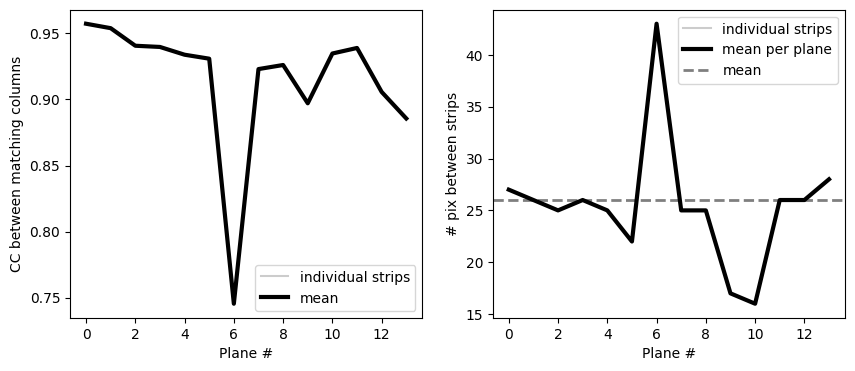

In [10]:
%%time
# This step only uses `n_init_files` files, so the  runtime will stay the same even with larger recordings
# soon this will also be gpu-ified to be faster!
job.run_init_pass()

## Registration
First, we do registration over time of the  xy-drift caused by brain movement. This is similar to Suite2P registratrion, it does rigid registration followed by non-rigid registration. This is accelerated on the GPU. Suite2P registration parameters can be changed, see `default_params.py` for a list of all parameters related to registration. After you have registered, you can load the registered fused movie into memory and take a look at the mean image. I suggest cropping the dark edges if you have any as shown in the cells below.

If you run out of gpu memory, try reducing the `gpu_reg_batchsize` parameter. I have a A4500 with 20GB memory which works well with a batchsize of 10.

In [12]:
job.register()

      Found dir D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data
      Updating self.dirs tag registered_fused_data
   Saved a copy of params at D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data
   Updated main params file
   Starting registration: 3D: True, GPU: True
   Not clipping frames for registration
Will analyze 2 tifs in 2 batches
   Enforcing positivity
   Launching IO thread
         Memory at batch 0.  Total Used: 041.300 GB, Virtual Available: 086.612 GB, Virtual Used: 041.201 GB, Swap Used: 000.098 GB
Loading Batch 0 of 1
      Loading D:\W2_DATA\wsnyder\2025_03_06\raw\Linesweep-3145992-100um-17p07hz-32power_00002.tif


C:\Users\RBO\repos\suite3d\suite3d\io\s3dio.py:262: UserWarning: Add explanation of how lbm tiffs are organized to the docstring.
  todo("Add explanation of how lbm tiffs are organized to the docstring.")
C:\Users\RBO\repos\suite3d\suite3d\io\s3dio.py:279: UserWarning: Removed the **mp_args argument from load_and_stitch_full_tif_mp, should we add it back?
  todo(
C:\Users\RBO\repos\suite3d\suite3d\io\lbmio.py:30: UserWarning: imread from tifffile has an overhead of ~20-30 seconds before it actually reads the file? Can we speed this up?
  todo(
<tifffile.TiffFile 'Linesweep-31459…2power_00002.tif'> <asarray> failed to reshape (7728, 912, 224) to (6000, 14, 912, 224), raised ValueError('cannot reshape array of size 1578737664 into shape (6000,14,912,224)')


    Loaded file into shared memory in 2.07 sec
    Workers completed in 1.97 sec
    Total time: 4.04 sec
   Loaded 1 files, total 2.90 GB
   Batch 0 IO thread joined
         Memory after IO thread joinTotal Used: 044.185 GB, Virtual Available: 083.730 GB, Virtual Used: 044.084 GB, Swap Used: 000.101 GB


C:\Users\RBO\repos\suite3d\suite3d\io\s3dio.py:64: UserWarning: This function is not implemented yet. Please implement it before using it!
  todo("This function is not implemented yet. Please implement it before using it!")


         Memory after movie copied from threadTotal Used: 047.085 GB, Virtual Available: 080.830 GB, Virtual Used: 046.984 GB, Swap Used: 000.101 GB
         Memory after thread memory clearedTotal Used: 044.180 GB, Virtual Available: 083.734 GB, Virtual Used: 044.080 GB, Swap Used: 000.101 GB
   Launching IO thread for next batch
         After IO thread launch:Total Used: 044.180 GB, Virtual Available: 083.734 GB, Virtual Used: 044.080 GB, Swap Used: 000.101 GB
      Loaded batch of size (14, 552, 449, 448)
      Loading D:\W2_DATA\wsnyder\2025_03_06\raw\Linesweep-3145992-100um-17p07hz-32power_00003.tif


<tifffile.TiffFile 'Linesweep-31459…2power_00003.tif'> <asarray> failed to reshape (9520, 912, 224) to (6000, 14, 912, 224), raised ValueError('cannot reshape array of size 1944821760 into shape (6000,14,912,224)')


    Loaded file into shared memory in 2.89 sec
    Workers completed in 2.30 sec
    Total time: 5.19 sec
   Loaded 1 files, total 3.57 GB
   Completed rigid reg on batch in :10.267314672470093s
   Shifted the mov in: 1.6124632358551025s
         After all GPU Batches:Total Used: 059.409 GB, Virtual Available: 068.505 GB, Virtual Used: 059.309 GB, Swap Used: 000.101 GB
      Saving fused, registered file of shape (14, 100, 573, 432) to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data\fused_reg_data0000.npy
         Saved in 0.95 sec
      Computing quality metrics and saving


C:\Users\RBO\repos\suite3d\suite3d\quality_metrics.py:22: RuntimeWarning: divide by zero encountered in divide
  'signal_to_background_ratio' : sig / bg,
C:\Users\RBO\repos\suite3d\suite3d\quality_metrics.py:41: RuntimeWarning: invalid value encountered in divide
  dff = df / fs.mean(axis=1,keepdims=True)
C:\Users\RBO\repos\suite3d\suite3d\quality_metrics.py:43: RuntimeWarning: All-NaN slice encountered
  noise_level = n.nanmedian(abs_d_dff, axis=1)


      Saving fused, registered file of shape (14, 100, 573, 432) to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data\fused_reg_data0001.npy
         Saved in 0.92 sec
      Computing quality metrics and saving
      Saving fused, registered file of shape (14, 100, 573, 432) to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data\fused_reg_data0002.npy
         Saved in 0.95 sec
      Computing quality metrics and saving
      Saving fused, registered file of shape (14, 100, 573, 432) to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data\fused_reg_data0003.npy
         Saved in 0.95 sec
      Computing quality metrics and saving
      Saving fused, registered file of shape (14, 100, 573, 432) to D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\registered_fused_data\fused_reg_data0004.npy
         Saved in 0.91 sec
      Computing quality metrics and saving
      Saving fused, registered file of shape (14, 52, 573, 432) to D:\W2_DATA\wsnyder\20

In [13]:
def get_files(base_dir, str_contains="", max_depth=1, sort_ascending=True) -> list | Path:
    """
    Recursively searches for files with a specific extension up to a given depth and stores their paths in a pickle file.

    Parameters
    ----------
    base_dir : str or Path
        The base directory to start searching.
    str_contains : str
        The string that the file names should contain.
    max_depth : int
        The maximum depth of subdirectories to search.
    sort_ascending : bool, optional
        Whether to sort files alphanumerically by filename, with digits in ascending order (i.e. 1, 2, 10) (default is False).

    Returns
    -------
    list
        A list of full file paths matching the given extension.
    """
    import re
    base_path = Path(base_dir).expanduser().resolve()
    if not base_path.exists():
        raise FileNotFoundError(f"Directory '{base_path}' does not exist.")
    if not base_path.is_dir():
        raise NotADirectoryError(f"'{base_path}' is not a directory.")
    if max_depth == 0:
        print("Max-depth of 0 is not allowed. Setting to 1.")
        max_depth = 1

    base_depth = len(base_path.parts)
    pattern = f'*{str_contains}*' if str_contains else '*'

    files = [
        file for file in base_path.rglob(pattern)
        if len(file.parts) - base_depth <= max_depth
           and file.is_file()
    ]

    if sort_ascending:
        def numerical_sort_key(path):
            match = re.search(r'\d+', path.name)
            return int(match.group()) if match else float('inf')

        files.sort(key=numerical_sort_key)

    return [str(file) for file in files]

# Put behavior somewhere, point this path to it
frames_path = r"D:\W2_DATA\wsnyder\2025_03_06\frames"
frames = get_files(frames_path, 'tif', 1)

frames[:4]  # make sure we are getting the frames, and theyre ordered

['D:\\W2_DATA\\wsnyder\\2025_03_06\\frames\\Frame_1.tiff',
 'D:\\W2_DATA\\wsnyder\\2025_03_06\\frames\\Frame_2.tiff',
 'D:\\W2_DATA\\wsnyder\\2025_03_06\\frames\\Frame_3.tiff',
 'D:\\W2_DATA\\wsnyder\\2025_03_06\\frames\\Frame_4.tiff']

In [ ]:
stack = []
for path in frames:
    img = tifffile.imread(path)
    stack.append(img)

# remove first 2 frames
stack = np.stack(stack)[2:]
stack.shape

In [12]:
import napari

viewer = napari.Viewer(ndisplay=3)

# functional imaging stack (TZYX)
viewer.add_image(
    mov_full,
    name='Imaging Data',
    scale=(1, 8, 1, 1),  # account for the anisotropy (2um XY : 16um Z ratio)
    rendering='mip',
)

# Add the behavior stack (T, Y, X, 3) but with RGB baked into last dim
# this squeeze into (T, 1, Y, X, 3) is to avoid it being interpreted as a 3D volume
stack_expanded = stack[:, None, :, :, :]

# Add with rgb=True — napari will treat the 2nd dim as singleton
viewer.add_image(
    stack_expanded,
    name='Behavior',
    rgb=True,
    colormap=None,
    blending='translucent',
)

viewer.layers['Behavior'].depiction = 'volume'
viewer.layers['Behavior'].visible = True
viewer.dims.ndisplay = 3  # global 3D mode, but Behavior stays 2D
viewer.dims.current_step = (0,) * viewer.dims.ndim


In [14]:
# spatial filter sizes for neuropil subtraction, and cell detection
# npil_filt is a low_pass filter that attempts to remove any features larger than the filter size (neuropil!)
# conv_filt_xy is a high_pass filter that amplifies any features that are smaller than ~2x the filter size (cells!)
# these values worked well for me with ~4um xy pixel spacing and ~15 um z pixel spacing, for detecting mouse somata
# When you change resolution, or if you're trying to detect smaller things, you will need to adjust these values
# because the units here are _pixels_, not microns!
job.params['cell_filt_type'] = 'gaussian'
job.params['npil_filt_type'] = 'gaussian'
job.params['cell_filt_xy_um'] = 5.0
job.params['npil_filt_xy_um'] = 3.0
job.params['cell_filt_z_um'] = 18
job.params['npil_filt_z']=  2.5

# normalization exponent, should be around 1.
# If you find blood vessels or the background being too bright in the correlation map, reduce it to ~0.7-0.8!
job.params['sdnorm_exp']= 0.8

# threshold applied to the normalized, filtered movie before it is accumulated into the correlation map
# if you increase it, the background will become darker (which is good!), however at some point you will
# start excluding dimmer cells (which is bad!)
job.params['intensity_thresh']= 1

## Compute parameters
# number of frames to compute at one iteration
# (any value above ~100-200 shouldn't affect results,
# decrease if you have RAM issues or if SVD reconstruction gets stuck on "Sending all blocks to dask to compute")
job.params['t_batch_size'] = 300
# number of processors to use when calculating the correlation map
job.params['n_proc_corr'] = 20
# number of frames per smaller batch within the batch, should be ~t_batch_size / n_proc_corr, but above ~5
job.params['mproc_batchsize'] = 5

import multiprocessing
num_cores = multiprocessing.cpu_count()
assert job.params['n_proc_corr'] < num_cores, f"Your computer has {num_cores} but job.params['n_proc_corr'] is set to {job.params['n_proc_corr']}"

In [17]:
crop = ((0,13), (130,445), (10, 440))
im_full = job.get_registered_movie()
cropped = im_full[:, :, crop[1][0]:crop[1][1], crop[2][0]:crop[2][1]]
cropped.shape

(14, 1283, 315, 422)

In [18]:
# ~1.5*fs
job.params["detection_timebin"] = 25
job.calculate_corr_map()

      Found dir D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\corrmap
      Updating self.dirs tag corrmap
      Found dir D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\mov_sub
      Updating self.dirs tag mov_sub
   Saved a copy of params at D:\W2_DATA\wsnyder\2025_03_06\results\s3d-v1\corrmap
   Updated main params file
   Computing correlation map of movie with 1283 frames, volume shape: 14, 573, 432
      Running batch 1 of 5
      Binning with timebin of size 25
         Timer batch_timebin completed in 0.000 sec
         Timer prep completed in 1.121 sec
         Timer batch_setup completed in 0.030 sec
         Timer batch_edgecrop completed in 0.005 sec
         Timer accum_meanmeax completed in 0.039 sec
         Timer batch_rolling_mean_filt completed in 0.021 sec
         Timer batch_accum_sdmov completed in 0.077 sec
         Timer batch_norm_sdmov completed in 0.025 sec
         Loading movie of size (12, 14, 573, 432) into shared memory
         Timer dtu_shmem completed in

NotImplementedError: The out parameter is not fully supported. Received type ndarray, expected Dask Array

In [171]:
results = job.load_corr_map_results()
vmap = results['vmap']
mean_img = results['mean_img']

job.params["npil_filt_xy_um"], job.params["cell_filt_xy_um"], job.params["cell_filt_z_um"], job.params["npil_filt_type"], job.params["cell_filt_type"]

(3.0, 5.0, 18, 'gaussian', 'gaussian')

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x222888c7b50>)

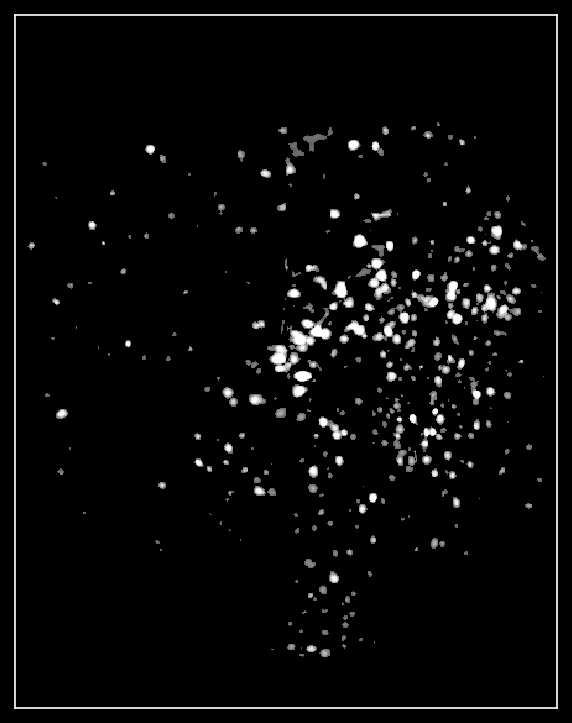

In [178]:
io.show_tif(vmap[9])

In [179]:
# visualize the correlation map
# here you can identify the best "peak_thresh"
# play with the contrast limits of vmap until only cells are visible
# the lower contrast limit should be used as "peak_thresh"

# as you change the contrast limit for the vmap image, the "viewer status" in the bottom left will print the value for you

results = job.load_corr_map_results()
mean_img = results['mean_img']
vmap = results['vmap']

v = napari.Viewer(title="Identify peak_thresh!")
v_meanimg = v.add_image(mean_img, name='mean image')
v_vmap = v.add_image(vmap, name='vmap')

def print_contrast_limits(event):
    v.status = f"Current peak_thresh: {v_vmap._contrast_limits[0]:.2f}"
    return None

_ = v_vmap.events.connect(print_contrast_limits)

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x22294db59a0>)

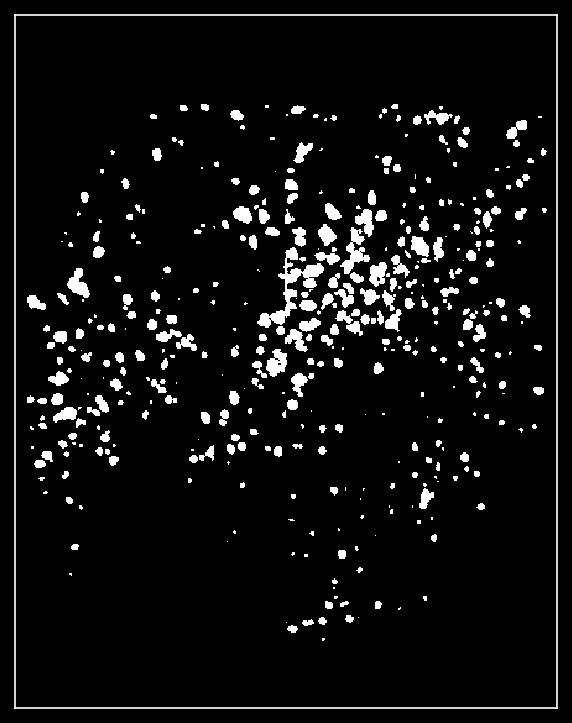

In [184]:
from suite3d import extension as ext
corr_map = job.load_corr_map_results()['vmap']
corr_map_thresh = ext.thresh_mask_corr_map(corr_map, thresh_window_size_pix = 51, corrmap_thresh_pct=55)
io.show_tif(corr_map_thresh[7], vminmax=(0.02,0.020001))

In [199]:
job.params['max_pix'] = 250
job.params['percentile'] = 99.0         # default
job.params['max_iter'] = 10000          # maximum number of ROIs detected in given patch
job.params["extend_thresh"] = 0.5
job.params["peak_thresh"] = .4
job.params["activity_thresh"] = 20.0    # default
job.params["percentile"] = 99.5           # default

job.segment_rois(vmap = corr_map_thresh)

      Found dir D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\segmentation
      Updating self.dirs tag segmentation
   Saved a copy of params at D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\segmentation
   Updated main params file
      Found dir D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois
      Updating self.dirs tag rois
   Saving results to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\segmentation and D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois 
dict_keys(['max_img', 'mean_img', 'vmap', 'all_params'])
   Detecting from patch 1 / 30
      Found dir D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\segmentation\patch-0000
         Loading 0.14 GB movie to memory, shape: (374, 14, 120, 120) 
         Loaded
         Loading movie patch to shared memory
         Loaded
      Starting extraction with peak_thresh: 0.400 and Th2: 20.000
      Iter 0000: peak is too small - ending extraction
   Found 0 cells in 1 iterations
   Sav

ValueError: not enough values to unpack (expected 2, got 1)

In [136]:
import matplotlib.pyplot as plt

npil_filt_xy_um = job.params['npil_filt_xy_um']
npil_filt_type = job.params['npil_filt_type']
cell_filt_xy_um = job.params['cell_filt_xy_um']
cell_filt_type = job.params['cell_filt_type']
cell_filt_z_um = job.params['cell_filt_z_um']
npil_filt_z_um = job.params["npil_filt_z_um"]

params_text = (
    f"npil XY: {npil_filt_xy_um} ({npil_filt_type}) | "
    f"cell XY: {cell_filt_xy_um} ({cell_filt_type}) | "
    f"cell Z: {cell_filt_z_um} | "
    f"npil Z: {npil_filt_z_um}"
)

fig, ax = plt.subplots(figsize=(4, 4), dpi=300)  # Adjust size as needed
ax.imshow(vmap[7], cmap='gray', aspect='auto')

ax.text(0.5, 1.02, params_text, fontsize=6, color='white', weight='bold',
        ha='center', va='bottom', transform=ax.transAxes)

ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)  # Reduce top padding

filename = Path().home().joinpath("repos", "nb_sandbox", f"corrmap_npilXY{npil_filt_xy_um}_{npil_filt_type}_cellXY{cell_filt_xy_um}_{cell_filt_type}_Z{cell_filt_z_um}.png")
plt.savefig(filename, bbox_inches='tight', pad_inches=-0.1, dpi=300)  # Further trim whitespace
plt.close()

print(f"Saved as {filename}")


Saved as C:\Users\RBO\repos\nb_sandbox\corrmap_npilXY5_gaussian_cellXY5_gaussian_Z20.png


## Detection
Now that we have a correlation map, we can segment the cells. The algorithm is similar to suite2p, it does the following:
1. Choose the peak value on the correlation map, and set this pixel as your _seed cell_
2. Identify the _active frames_ of the candidate cell by taking all frames where the activity of the cell is greater than a threshold (`activity_thresh`) or have activity above a certain percentile (`percentile`) 
3. Look at the activity of all neighboring pixels of the _seed cell_ during the _active frames_ of the seed cell. If a candidate pixel's activity is similar to the activity of the _seed cell_ (similarity above `extend_thresh`), include the pixel in the _seed cell_.
4. Repeat steps 2-3 until you've grown the cell as much as you can
5. Remove the cell from the correlation map
6. Find the next largest peak of the correlation map, take this as your seed cell and repeat steps 2-6
7. Stop when the peak value of the remaining correlation map is below a user-specified threhsold (`peak_thresh`)
Two main improvements over Suite2p: first, this is done in 3D. Second, it is parallelized to be much faster, as it works on patches of the movie separately!

**The most important variable that you *must* set is `peak_thresh`**. To do this, use the cell below to visualize the correlation map (`vmap` for short) using napari. Use the contrast sliders to find a minimum value where all spots above this value look like they might be cells. I find it useful to set the range to be very small, all pixels above the minimum are basically white. You should try to get rid of most of the obvious noise (e.g. artifacts at edges or around blood vessels, specks of single-pixel white spots, stuff outside the brain). It is not critical to exclude everything, you can be generous here and remove ROIs based on other criteria later. However, if you are too generous, you'll end up with too many pixels above the threhsold and your detection will take forever, with a lot of extra junk cells. I recommend starting a little conservative, and then push the limits. 

**Other useful variables**: When you have long enough recordings, 0.2 for `extend_thresh` is OK. However, if you have only a very short recording, or you find many cells that are much larger than they should be (with large, sprinkly footprints that extend way beyond the cell), or you have large cloudy blobs of noise being picked up as cells, increase `extend_thresh`. `activity_thresh` and `percentile` work together, usually it's good enough to just pick one and change it. If you have few frames, or you feel like you have low signal, it's better to set these to be lower, so you include more frames when evaluating a cell. However, if you can afford to, it's good to keep them high (`activity_thresh` around 10, `percentile` around 99.0), because then sparsely-firing cells will be picked up easier. Play around and see!

**To make it faster to try parameters, you can run the detection only on a subset of the patches**. By default the movie is split into ~100 patches (I think), but if you pass `job.patch_and_detect(do_patch_idxs=(10,20,50,80))` then the detection will only run on the specified patches.

**Detection always works better with more frames!** 300 frames is a very small number, so don't expect it to work perfectly on this demo.

In [274]:
# most important parameter - any value of the corrmap
# above this will be considered a peak for a possible ROI,
# and will be used as a "seed" to grow an ROI around it
# bigger number: fewer ROIs, only bright ones
# smaller number: many ROIs, increasingly worse quality
# job.params['peak_thresh'] = 1.5

# optionally, bin the movie in time to speed up detection
# probably a good idea if you have high framerate (>5 Hz?)
job.params['detection_timebin'] = 6
job.params['segmentation_timebin'] = 1

# when extending an ROI, compare its activity to its neighboring pixels
# in frames where the fluorescence is above this percentile
job.params['percentile'] = 99.5


job.params['extend_thresh'] = 0.01
# params_to_sweep = {
#     'extend_thresh' : (0.01, 0.03, 0.1),
#     'percentile'   : (70.0, 99.5),
#  }

### Compute neuropil masks, extract activity and deconvolve
For each cell, compute a donut around it excluding all other cells to use it to estimate the local neuropil activity. Then, extract the activity of the cell and the neuropil, subtract 0.7\*neuropil activity from the ROI activity, and deconvolve using Oasis. Make sure you have set the `tau` parameter correctly for the deconvolution.

In [194]:
job.compute_npil_masks(stats_dir = job.dirs['rois'])

'D:\\W2_DATA\\kbarber\\2025_03_01\\mk301\\results\\s3d-03_25\\rois'

In [138]:
traces = job.extract_and_deconvolve(stats_dir=job.dirs['rois'])

   Updated main params file
   Movie shape: (14, 5632, 561, 452)
303
   Extracting 303 valid cells, and saving cell flags to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\iscell_extracted.npy
   Extracting activity
         Will extract in 12 batches of 500
   Saving intermediate results to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois
   Deconvolving
   Saving to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois


In [195]:
# rpath
res_dir = Path(job.dirs["job_dir"]).joinpath('fix-strips-small-pthresh')

In [196]:
job.export_results(res_dir, result_dir_name='rois')

   Created dir D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\fix-strips-small-pthresh\s3d-results-03_25 to export results
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\stats_small.npy
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\info.npy
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\F.npy
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\spks.npy
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\Fneu.npy
      Loading from D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\rois\iscell.npy
      Saved stats.npy to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\fix-strips-small-pthresh\s3d-results-03_25
      Saved info.npy to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\fix-strips-small-pthresh\s3d-results-03_25
      Saved F.npy to D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\fix-strips-small-pthresh

# Run the Napari manual curator! 
in any conda terminal with napari installed, you can launch the curator
this doesn't necessarily need to be on the same computer that you run this
notebook on, the exported directory contains everything necessary.

```
python suite3d/suite3d/curation.py curation --output_dir /mnt/data/demo
```

## Load outputs and analyze
This is how you can access the traces for each cell, and the locations for each cell

In [191]:
out_path

WindowsPath('D:/W2_DATA/kbarber/2025_03_01/mk301/results/s3d-03_25/fix-corrmap-ext_thr_0p02/s3d-results-03_25')

In [ ]:
%gui qt
out_path = res_dir.joinpath("s3d-results-03_25")
outputs = ui.load_outputs(out_path, load_traces=False)
v,layers = ui.create_ui(outputs)
ui.add_callbacks_to_ui(v,layers,outputs,savedir=out_path)

Cells
Found old curated + slider-ed iscell with 2114 of 2114 marked as cells
Saving old iscell_curated to backup path D:\W2_DATA\kbarber\2025_03_01\mk301\results\s3d-03_25\fix-strips-small-pthresh\s3d-results-03_25\iscell_curated_slider_old_27-03-25_17-34-33.npy
('vmap_peak', (0.06666971, 0.20809474587440496), 'peak_val', <function add_curation_sliders.<locals>.<lambda> at 0x0000022347F6CE50>)


1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1511, 1511 cells valid
Cells
1511, 1511 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1511, 1511 cells valid
Cells
1511, 1511 cells valid
Cells
1155, 1155 cells valid
Cells
1155, 1155 cells valid
Cells
1154, 1154 cells valid
Cells
1154, 1154 cells valid
Cells
1, 1 cells valid
Cells
1, 1 cells valid
Cells
2, 2 cells valid
Cells
2, 2 cells valid
Cells
2, 2 cells valid
Cells
2, 2 cells valid
Cells
3, 3 cells valid
Cells
3, 3 cells valid
Cells
2, 2 cells valid
Cells
2, 2 cells valid
Cells
1154, 1154 cells valid
Cells
1154, 1154 cells valid
Cells
1154, 1154 cells valid
Cells
1154, 1154 cells valid
Cells
1153, 1153 cells

In [135]:
n_cells, n_t = outputs['F'].shape
frame_times = n.arange(n_t) / outputs['fs']
example_cell = 90
plt.plot(frame_times, outputs['F'][example_cell], label='ROI Fluorescence')
plt.plot(frame_times, outputs['Fneu'][example_cell], label='Neuropil Fluorescence')
plt.plot(frame_times, outputs['spks'][example_cell], label='Deconvolved activity')
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Activity")

KeyError: 'F'

In [136]:
# suite2p-style list of all cells
cell_stats = outputs['stats']
print(cell_stats[example_cell].keys())

NameError: name 'example_cell' is not defined

In [123]:
cell_coords = [stat['coords'] for stat in cell_stats]
cell_centers = n.array([stat['med'] for stat in cell_stats])
vmap_shape = outputs['vmap'].shape

(<Figure size 1200x900 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x18f73755f10>)

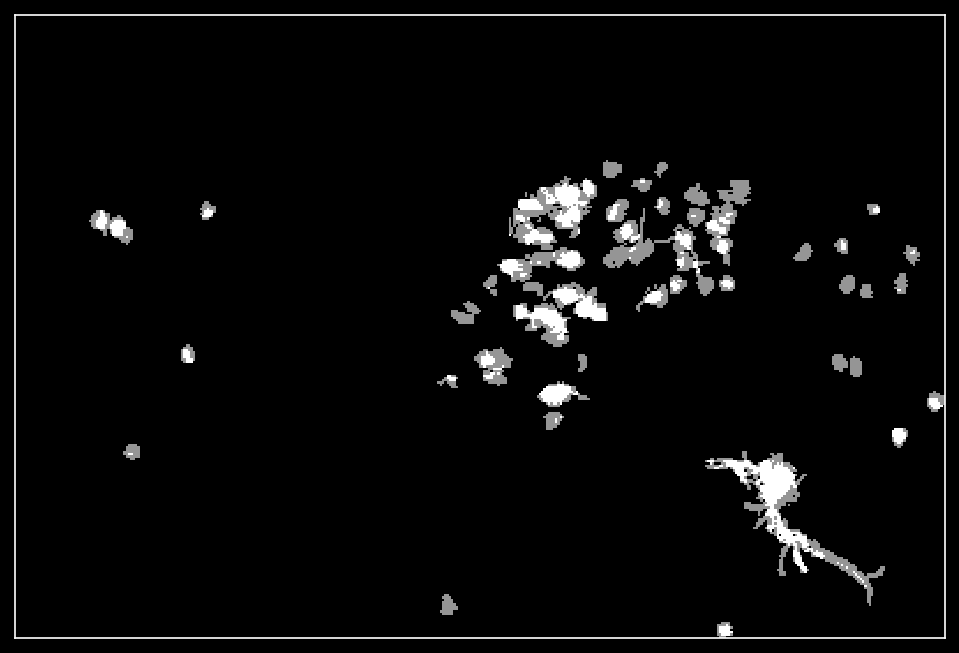

In [132]:
# make a volume with the footprints of all cells and plot a max-projection of it along z
cell_vol = ui.fill_cells_vol(cell_coords, fill_vals = n.ones(len(cell_coords)), empty=0)
io.show_tif((cell_vol ).mean(axis=0))

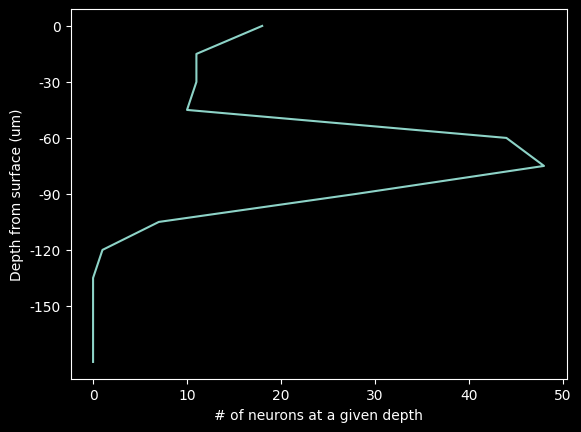

In [125]:
hist,bins = n.histogram(cell_centers[:,0],bins = n.arange(vmap_shape[0]))
bins = bins[:-1]

plt.plot(hist, bins)
plt.xlabel("# of neurons at a given depth")
plt.ylabel("Depth from surface (um)")
plt.yticks(n.arange(bins.max(),0,-bins.max()//6), -15*(bins.max()-n.arange(bins.max(),0,-bins.max()//6)));

# from the plot, seems like the shallowest plane has lots of cells,
# possibly because it's out of the brain and it's mostly noise...
# it might be a good idea to exclude them in the curation
# probably, when you have a longer recording you won't have this issue as much